In [30]:
import numpy as np
from matplotlib import pyplot as plt
import math as m
import pickle
import sys
from matplotlib.animation import FuncAnimation

In [39]:
class Hopfield():
    
    def __init__(self, L, training=0, s=0, random=False):
        self.L = L
        self.n = int(L**2)
        if type(s)==int:
            self.s = np.random.choice([-1, 1], size=self.n)
        else:
            self.s = np.flatten(s)
        self.bias = 2*np.random.rand(self.n) - 1
        if random:
            init_w = 2*np.random.rand(self.n, self.n) - 1
            self.w = (init_w + init_w.T)/2
            np.fill_diagonal(self.w, 0)
        else:
            try:
                num_trains = len(training)
                training = np.array(training)
            except:
                training = np.array[training]
                num_trains = 1
            self.w = np.zeros(self.n, self.n)
            print("weights set to zero")
            ## training
        self.energy = self.calc_energy()
        self.energy_history = [self.energy]
        
    def calc_energy(self):
        return self.s.T@self.w@self.s + self.bias.T@self.s
    
    def E_current(self, pt):
        return self.s[pt]*np.sum(self.w[pt]@self.s)
    
    def run(self, sweeps):
        for sweep in range(sweeps): 
            points = np.random.randint(self.n, size=[self.n])
            for pt in points:
                E = self.E_current(pt)
                if E > 0:
                    self.s[pt] = self.s[pt]*-1
                    self.energy += -2*E
            self.energy_history.append(self.energy)
        return self.s

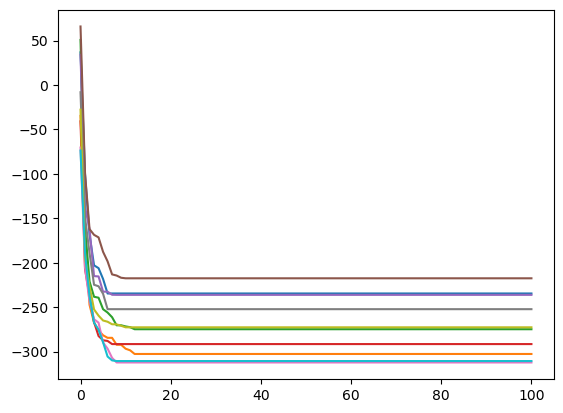

In [42]:
energies = []
for i in range(10):
    testing = Hopfield(10, random=True)
    testing.run(100)
    energies.append(testing.energy_history)
plt.figure()
for i in range(len(energies)):
    plt.plot(energies[i])
plt.show()